# Assignment: Lab 05 - PCA
## Krishu Wadhwa - euj7fh
## December 06, 2024

In [60]:
# imports 

import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


**Q1. Open the `Phishing_Email.parquet` data. Use the `str.split()` method to break the Phishing Email values into tokens: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.**

**In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.**

In [61]:
phishing = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
tokens = phishing['Email Text'].str.split() # Use the `str.split()` method to break the Phishing Email values into tokens
tokens.head() # Print the results of your split and examine it.

0    [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1    [the, other, side, of, *, galicismos, *, *, ga...
2    [re, :, equistar, deal, tickets, are, you, sti...
3    [Hello, I, am, your, hot, lil, horny, toy., I,...
4    [software, at, incredibly, low, prices, (, 86,...
Name: Email Text, dtype: object

To clean the tokens, I would first convert all the text to lowercase. After this, I would remove punctuation and irrelevant characters and words (stop words such as "the", "and", and "is"). I would also remove numbers. I would then focus on finding popular phising patterns such as those emails with links to verify your account or send personal details such as a password or bank information. In order to use the tokens for prediction, I would one-hot encode them to check if certain words/phrases are in an email or not. This would help the model learn phishing patterns, such as how words like "verify" and "account," are more likely to appear in such phishing scam emails. With more use, the model gets better at predicting which emails are phishing scams as it learns the patterns.

**Q2. I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:**

In [62]:
with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)
    
from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

**Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?**

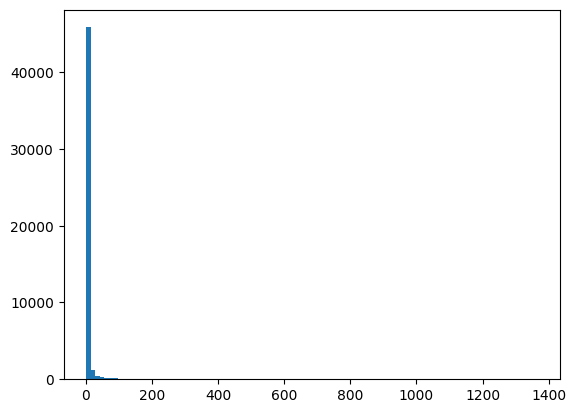

count    48691.000000
mean         5.687889
std         27.717476
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1365.000000
Name: count, dtype: float64

In [63]:
histogram = pd.DataFrame(token_freq,columns=['token','count'])
histogram['count'].hist(grid=False,bins=100)
plt.show()
histogram['count'].describe()

The histogram is heavily skewed to the right, with a peak at the lower end (1-2 occurrences). This shows that most of the tokens are only used once or twice. The skew (as shown by the long tail), however, does suggest that a few tokens do appear much more often. This is supported by the figures from `describe()`. The mean is approximately 5.69, and the minimum, first quartile, median are all 1. Even the third quartile is 2. However, there is a maximum value of 1365, and this aligns with the long tail shown in the histogram, as there are a few tokens which appear very frequently. 

**Q3. Load `Phishing_clean.parquet`.**   
**a. Perform an 80/20 train-test split of the data.**

In [64]:
phishing_clean = pd.read_parquet('Phishing_clean.parquet') # Load `Phishing_clean.parquet`.

y = phishing_clean['Email Type']
X = phishing_clean.drop('Email Type', axis = 1)

# Perform an 80/20 train-test split of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2, 
                                                    random_state = 100) 

**b. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?**

In [65]:
# Run a regression of y on the one-hot-encoded emails
regression = LinearRegression(fit_intercept = False).fit(X_train, y_train) 

y_hat_train = regression.predict(X_train)
y_hat_test = regression.predict(X_test)

print('Rsq (Test): ', r2_score(y_hat_test,y_test)) # What is the R^2 on the test set?
print('Rsq (Train): ', r2_score(y_hat_train,y_train)) # On the training set?

Rsq (Test):  -0.0005324622697673309
Rsq (Train):  0.6231491416517438


**c. What words have the largest coefficients in absolute value and most strongly influence prediction?**

In [66]:
coefficients = pd.DataFrame({'variable': regression.feature_names_in_ , 'value': regression.coef_})
coefficients['abs'] = np.abs(coefficients['value'])
coefficients.sort_values('abs',ascending=False).head(20)

,variable,value,abs
1380,wysak,1.832279e+13,1.832279e+13
1760,wysk,-1.832279e+13,1.832279e+13
33,2001,-1.794846e+13,1.794846e+13
864,2nd,-1.567520e+13,1.567520e+13
1798,url(http://images.lockergnome.com/images/issue...,1.486718e+13,1.486718e+13
1034,underline;,-1.486718e+13,1.486718e+13
1584,demokritos,1.254169e+13,1.254169e+13
1641,iit,-1.254169e+13,1.254169e+13
710,1997,1.183304e+13,1.183304e+13
1573,100%,1.137288e+13,1.137288e+13


The words with the highest absolute value for their coefficients are those which have the strongest influence on predicting whether an email is a phishing scam or not. Some of the tokens were URLs and "underline", and since scam links often show up in such emails, there is some level of accuracy with the model. However, looking at the results above there doesn't really seem to be the clearest of trends. Despite the training set performing moderately well at $0.6231$ accuracy, the test set performed poorly at $-0.000532$. Therefore, we can assume that the model is overfitting here.

**Q4. Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?**

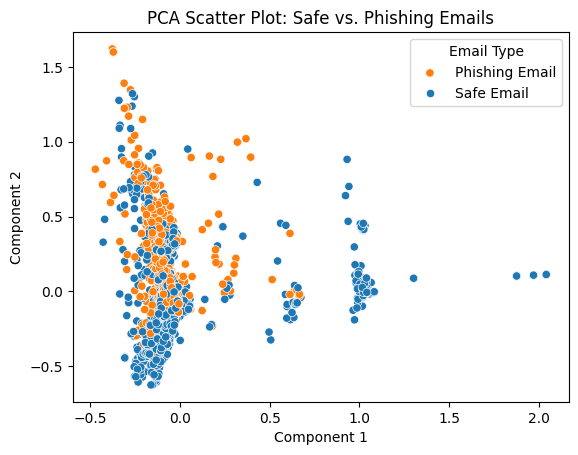

In [67]:
reduction = PCA(n_components = 2).fit(X_train)

Z_train = reduction.transform(X_train)
Z_test = reduction.transform(X_test)

sns.scatterplot(x = Z_test[:, 0], y = Z_test[:, 1], hue = y_test)
plt.title('PCA Scatter Plot: Safe vs. Phishing Emails')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title = 'Email Type', labels = ['Phishing Email', 'Safe Email'])
plt.show()

The blue points are the safe emails and the orange points are the phishing emails. It seems to be that the phishing emails do cluster on the left side, with higher second components and lower first components. Safe emails are more spread out, and some are even actually clustered on the right side of the plot with high first components.  

**Q5. Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.) How does this performance compare to the linear regression?**

In [59]:
reduction = PCA(n_components = 2610).fit(X_train)

Z_train = reduction.transform(X_train)
Z_test = reduction.transform(X_test)

regression = LinearRegression().fit(Z_train, y_train) 

y_hat_train = regression.predict(Z_train)
y_hat_test = regression.predict(Z_test)

print('Rsq (Test): ', r2_score(y_hat_test,y_test)) 
print('Rsq (Train): ', r2_score(y_hat_train,y_train))

Rsq (Test):  0.5761002613787806
Rsq (Train):  0.6967854877754098


This second linear regression of $y$ on the first 2,610 principal components of $X$ significantly improved the model's performance compared to the first one. In this second regression, the $R^2$ for the training set was similar to that of the first one, but still higher, at $0.6968$ (second) compared to $0.6231$ (first). Moreover, in the second regression, the training set's $R^2$ significantly improved as it is now at $0.5761$ compared to initially, where it was $-0.000532$. This improvement suggest that this new regression model is much more effective and addressed the overfitting problem well as it worked better with the unseen data.

**Q6. Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.**

Using principal components to run this high-dimensional regression, rather than the original data, is advantageous because it only focuses on the most relevant and important patterns. This helps to reduce overfitting and therefore also improves the model's ability to work with new and unseen data. This is useful when other features can be redundant and reduce the model's accuracy. At the same time, however, it is important to note that when using the principal components, it can be hard ot interpret the results as unlike the original features (specific words and tokens), it is not as clear which features have the strongest influence on the predictions.